# DS Bootcamp - U1L4.5 - CAPSTONE Narrative analytics and experimentation
... The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

- Analysis that highlights your experimental hypothesis.
- A rollout plan showing how you would implement and rollout the experiment
- An evaluation plan showing what constitutes success in this experiment

...

First, dive in and explore the data set. Include your code and visuals from this process in your final write up. <B>While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We import the data from csv file:
df = pd.read_csv('think capstone1_slim.csv' ,encoding ='latin1')

In [3]:
# Get a feel for the data:
df.head()

,YYYY_MM,IdProduct,Product_Name,Manufacturer_Name,Product Classification,IdLocation,Drugstore_Name,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
0,2015-1,20177,Nut Seringa Ject 10 Ml Cu Ac,MINUT,_DispozitivMedicalMultiplu,3,Stad,45.73,15,0,86.0,18.07,2,3
1,2015-1,2130,Panthen Unguent 50 Mg /G X 100 G,BAYER SCHERING,Cosmetice,3,Stad,265.55,4,0,5.0,46.66,1,1
2,2015-1,18,Oderma Abc Derm Gel Spumant X 200 Ml,BIODERMA,Cosmetice,3,Stad,37.42,1,0,1.0,9.45,14,9
3,2015-1,20697,Ltene Tratament Pt Unghii,FOLTENE,Cosmetice,3,Stad,48.90,1,0,1.0,4.38,8,33
4,2015-1,25030,Nsiprod Tensiometru Pentru Brat,PANSIPROD,Dispozitive Medicale,3,Stad,408.16,2,0,2.0,96.13,1,2


                           Product_Name Product Classification  Net_Profit  \
289   O-Dis L-Arginina 500 Mg X 50 Cps.                PROPRII    21577.01   
80   Eprazol Atb 20 Mg X 20 Cps. Gastr.                     RX    16787.49   
29                 Bilet 5 Mg X 28 Cpr.                     RX     9990.44   
419         Rtensif Sr 1.5 Mg X 30 Cpr.                     RX     8338.17   
287       O-Dis Digmax 400 Mg X 50 Cps.                PROPRII     8139.40   

     Units_Sold  
289     1016.74  
80      1848.40  
29      2419.85  
419     2033.97  
287      347.04  


C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


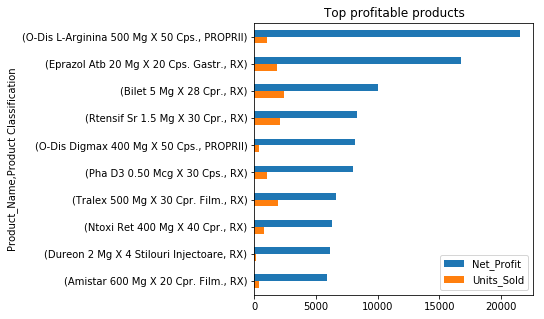

In [13]:
a = df.groupby(['Product_Name','Product Classification'])['Net_Profit','Units_Sold'].sum().reset_index()
a = a.sort_values(by=['Net_Profit'],ascending=False)
print(a.head())

a.head(10).plot(x=['Product_Name','Product Classification'], y =['Net_Profit','Units_Sold'] , kind='barh', figsize=[5, 5]
                ,title="Top profitable products"
               #,color='r'
               )
plt.gca().invert_yaxis()
plt.show()

### Re:

We are going to anlyze through the same data as in Capstone from prep course.

The sample of data is from the sales of a drugstore retail chain.

The data is extracted from a database with a few million rows. The data was aggregated on IdLocation and calendar months('YYYY-MM') by the 'Total_Sales', 'Units_Sold' and 'Net_Profit'. I extracted only the products that met the top 10 criteria on either 'Total_Sales' or 'Net_Profit', for each product classification and for each of the 5 locations.

To be able to perform an experiment I went through the data and I noticed the graph above that plots Net_Profit and Units_Sold per product.

We were very excited to discover that from a considerable smaller number of units sold than the 2nd, 3rd or 4th products, the profir is very high for the first in ranks: 'O-Dis L-Arginina 500 Mg X 50 Cps.(PROPRII)'.

We also noticed that this product is classified in the 'PROPRII' group and the next 3 products are in 'RX' group. We remeber that the RX group is made from drugs sold only with prescription and that have their selling and acquisition price set by the government. 

If we could increase the units sold for this product, the benefit would be great for the company.

### Setting the Stage

We are going to use a marketing campaign that uses the same text message to advertise for our 'control' group the same discount percentage as they usually get(10%), and for the test group(13%). The text message includes a few words about the health advanteges.

We are going to use our clients' database that have a mobile telephone number and their age higher than 35s. We are texting the predefined text with an individual code.  When the client comes in the pharmacy he has to provide the code to get the discount for the product so we can track who acted on the SMS.

**Success metric:** If clients from the test group that buy the product using the code are more than the control ones it means the percentage of discount was at a good level to attract them. To turn this patient into a recurring one the sales team has to make a good impression on him with very good quality health advises. 

**Secondary metrics:** We are measuring the time between sending the SMS and the date of the purchase to see how motivated the clients are.

We can test our idea with a sample of data, 10% of phone numbers from our 30.000,  which we are going to split in test, 20%, and control, 80%. We send the message to them and collect the data for those who come and make the purchase. We apply a t-test to see if the the averages of them differ significantly. We can use a threshold of 5% to reject the null hypothesis that there will be no difference in clients' preferences.

Because we are wainting for the clients to respond, the time parameter can impact our result. We can give a two week time for the first test to be fruitful.

After this, if the p-value is low enough, we can roll the rest of the text messages to our clients. We are going to monitor how many clients come and make the purchase and which one are test and which are from control group. We then apply again the t-test to see if the result is pertinent.

We have to make sure that the numbers we are sending the SMSs are correct. Thus we pay a tax to the phone company to check their validity. We don't want to enter the trap of fake numbers that could dilute our numbers.

It is also a good idea to check the competition to see if they have a similar campaign on a product that heals the same simptoms in order to minimize the bias toward collision with other events.

Because sending text messages takes a while to complete we have to find out what is the average sending time per SMS. Then, we have compute how many hours will the sending take. If it is going to take more than 8 hours we have to split the numbers into a few groups. Also, the time of day will matter as the client who receives the SMS should be at the perfect hour to be able to pay attention to our adverisment. Some clients could be at work and we should send them the message either around noon, at lunch break, or arounf 17 o'clock. Other clients could be a retired worker and the morning is a good time to hit as they prepare to leave their home for easy activities. The SMS should not be received latter than 19 o'clock as we don't want to interfere with family time or sleeping time. All this assumptions are made for the case we have quite detailed information about our clients.

At the end of the campaign it would be a success to see a higher number of units being sold as before. We would know with a good percentage of certainty what was the impact to Net_Profit among other normal sales from the same product.